In [1]:
from functools import cache
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1:

In [31]:
def wachstumsfaktor_q(p: int = 3) -> float:
    return 1 + p/100

x0 = 1000
q = wachstumsfaktor_q(p = 7)
a = 0.02

In [32]:
# Fall A:

@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else:
        return q * rekursion(n - 1)
    
def explizit(n: int) -> float:
    return x0 * q**n


print("Rekursion:", rekursion(100))
print("Explizit:",explizit(100))

Rekursion: 867716.3255664175
Explizit: 867716.3255664171


In [33]:
# Fall B: 

@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else: 
        return rekursion(n - 1) + x0 * (q - 1)
    
def explizit(n: int) -> float:
    return x0 + n * x0 * (q - 1)

print("Rekursion:", rekursion(100))
print("Explizit:", explizit(100))

Rekursion: 8000.0
Explizit: 8000.000000000006


In [34]:
# Fall C:

@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else:
        return q * rekursion(n - 1) - a * x0
    
def explizit(n: int) -> float:
    return x0 * q**n - a * x0 * ((q**n - 1) / (q - 1))

print("Rekursion:", rekursion(100))
print("Explizit:", explizit(100))

Rekursion: 620083.089690298
Explizit: 620083.0896902981


## Aufgabe 2:

In [67]:
N = 5000
x0 = 100
p = 15

@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else:
        return rekursion(n - 1) + (N - rekursion(n -1)) * (p/100)

def explizit(n: int) -> float:
    return N - (N - x0) * (1 - p/100)**n

print("Rekursion:", rekursion(15))
print("Explizit:", explizit(15))

Rekursion: 4571.964326403868
Explizit: 4571.964326403867


## Aufgabe 3:

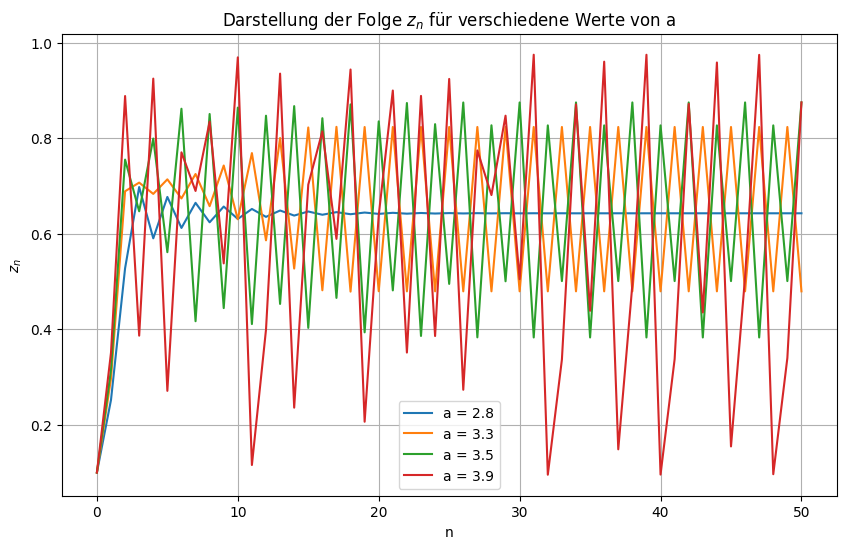

In [2]:
z0 = 0.1
n = 50
a_values = [2.8, 3.3, 3.5, 3.9]

def zn(z0, a, n):
    z_values = [z0]
    for _ in range(n):
        z_next = a * z_values[-1] * (1 - z_values[-1])
        z_values.append(z_next)
    return z_values

# Erzeugen der Plots für die verschiedenen Werte von a
plt.figure(figsize=(10, 6))

for a in a_values:
    z_values = zn(z0, a, n)
    plt.plot(range(n+1), z_values, label=f'a = {a}')

# Plot Einstellungen
plt.title('Darstellung der Folge $z_n$ für verschiedene Werte von a')
plt.xlabel('n')
plt.ylabel('$z_n$')
plt.legend()
plt.grid(True)

# Graph anzeigen
plt.show()


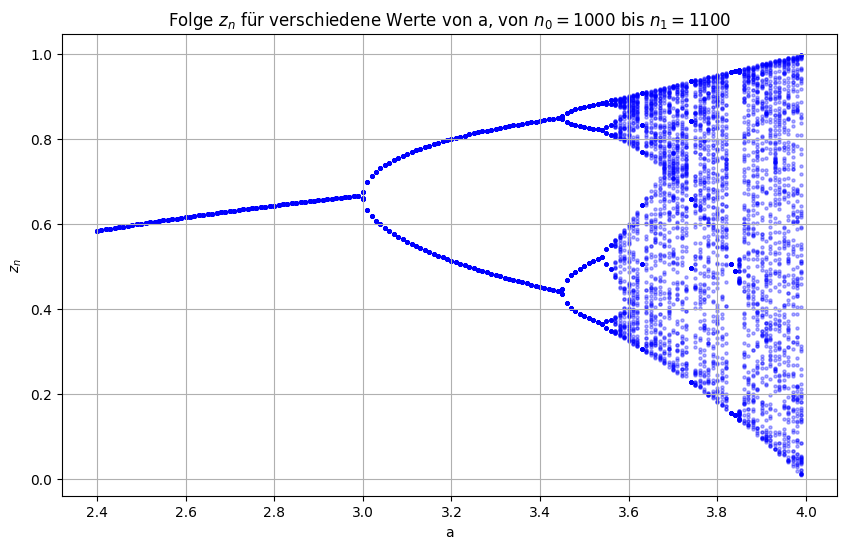

In [3]:
e = 0.01
n0 = 1000
n1 = 1100
z0 = 0.5
a_values = np.arange(2.4, 4.0, e)

def compute_zn_detailed(z0, a_values, n0, n1):
    results = []
    for a in a_values:
        z_values = [z0]
        for _ in range(n1):
            z_next = a * z_values[-1] * (1 - z_values[-1])
            z_values.append(z_next)
        results.append((a, z_values[n0:n1+1]))
    return results

detailed_results = compute_zn_detailed(z0, a_values, n0, n1)

plt.figure(figsize=(10, 6))
for a, z_values in detailed_results:
    plt.scatter([a] * len(z_values), z_values, alpha=0.3, s=5, color='blue')

plt.title('Folge $z_n$ für verschiedene Werte von a, von $n_0 = 1000$ bis $n_1 = 1100$')
plt.xlabel('a')
plt.ylabel('$z_n$')
plt.grid(True)

plt.show()
